### About Plotly

Plotly is a Data Viz library by the company Plotly based out of Canada with support in languages such as Python, Js, Julia etc.

#### Advantages

- Multi language support
- Lot's of graphs
- Interactive plots
- Beautiful plots

Does not work with live data streams. Dash can be explored for that.

### The Plotly Roadmap

- Plotly Go
- Plotly Express
- Dash

### Working with Plotly Go

In [4]:
# import the libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import plotly.express as px

In [5]:
# import datasets
tips = px.data.tips()
iris = px.data.iris()
gap = px.data.gapminder()

In [6]:
gap.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [7]:
# scatter plot using plotly go

temp_df = gap[gap['year'] == 2007]
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

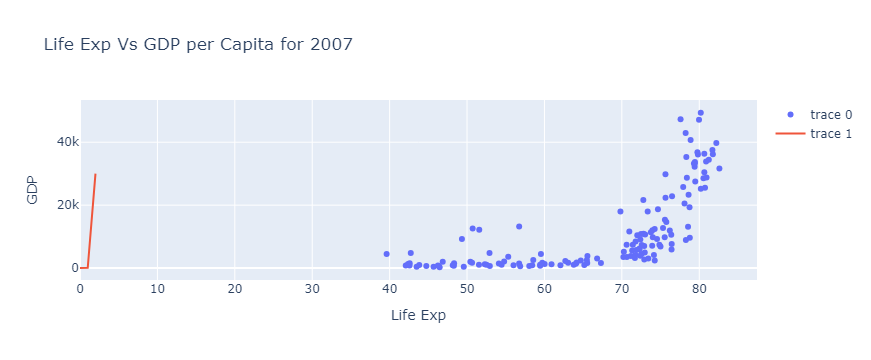

In [8]:

trace1 = go.Scatter(x=temp_df['lifeExp'],y=temp_df['gdpPercap'],mode='markers')
trace2 = go.Scatter(x=[0,1,2],y=[0,90,30000],mode='lines')

data = [trace1,trace2]

layout = go.Layout(title='Life Exp Vs GDP per Capita for 2007', xaxis={'title':'Life Exp'},yaxis={'title':'GDP'})
fig = go.Figure(data,layout)

fig.show()

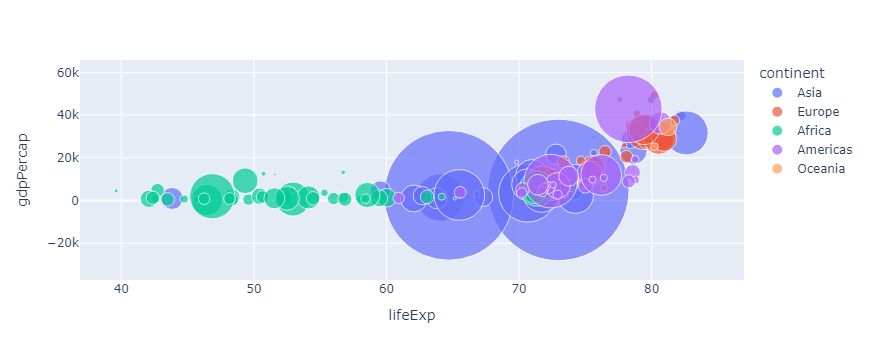

In [9]:
# plot life exp and gdp scatter plot -> continent as color -> pop as size -> hover name -> range_x/range_y -> log_x/log_y
px.scatter(temp_df, x='lifeExp', y='gdpPercap',color='continent',size='pop',size_max=100, hover_name='country')

In [10]:
# plot animation of the above curve on the basic of year
px.scatter(gap, x='lifeExp', y='gdpPercap',
           color='continent',size='pop',
           size_max=100, hover_name='country',
           range_x=[30,95],
           animation_frame='year',animation_group='country')

In [11]:
# line plot
# plot india pop line plot
temp_df = gap[gap['country'] == 'India']

px.line(temp_df, x='year', y='pop',title='India pop growth')

In [12]:
# plot india china pak line plot
temp_df = gap[gap['country'].isin(['India','China','Pakistan'])].pivot(index='year',columns='country',values='lifeExp')
temp_df

country     China   India  Pakistan
year                               
1952     44.00000  37.373    43.436
1957     50.54896  40.249    45.557
1962     44.50136  43.605    47.670
1967     58.38112  47.193    49.800
1972     63.11888  50.651    51.929
1977     63.96736  54.208    54.043
1982     65.52500  56.596    56.158
1987     67.27400  58.553    58.245
1992     68.69000  60.223    60.838
1997     70.42600  61.765    61.818
2002     72.02800  62.879    63.610
2007     72.96100  64.698    65.483

In [13]:
px.line(temp_df, x=temp_df.index, y=temp_df.columns)

In [14]:
# bar chart
# india's pop over the years
temp_df = gap[gap['country'] == 'India']
px.bar(temp_df,x='year',y='pop')

In [15]:
# pop comp of 3 countries
temp_df = gap[gap['country'].isin(['India','China','Pakistan'])].pivot(index='year',columns='country',values='pop')
temp_df

country       China       India   Pakistan
year                                      
1952      556263527   372000000   41346560
1957      637408000   409000000   46679944
1962      665770000   454000000   53100671
1967      754550000   506000000   60641899
1972      862030000   567000000   69325921
1977      943455000   634000000   78152686
1982     1000281000   708000000   91462088
1987     1084035000   788000000  105186881
1992     1164970000   872000000  120065004
1997     1230075000   959000000  135564834
2002     1280400000  1034172547  153403524
2007     1318683096  1110396331  169270617

In [16]:
# grouped bar chart -> text_auto
px.bar(temp_df,x=temp_df.index,y=temp_df.columns,barmode='group',log_y=True,text_auto=True)

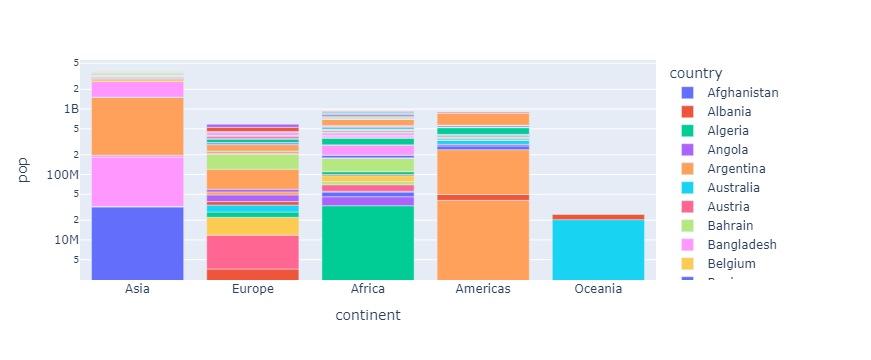

In [17]:
# stacked bar chart
# pop contribution per country to a continents pop stacked for a particular year(2007)
temp_df = gap[gap['year'] == 2007]
px.bar(temp_df, x='continent', y='pop', color='country',log_y=True)

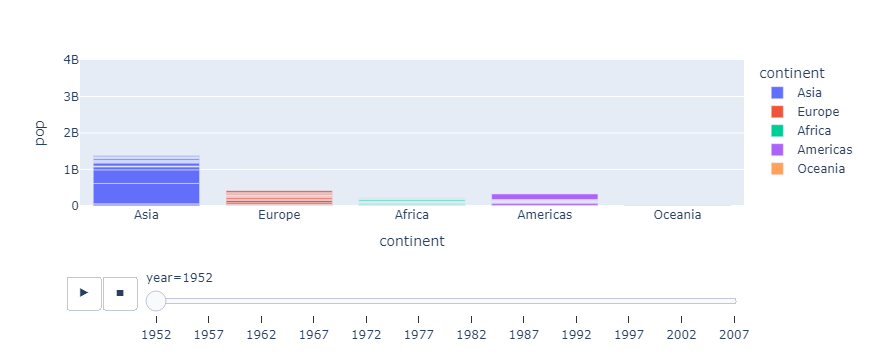

In [18]:
# bar chart animation
px.bar(gap, x='continent',y='pop',color='continent',animation_frame='year',animation_group='country',range_y=[0,4000000000])

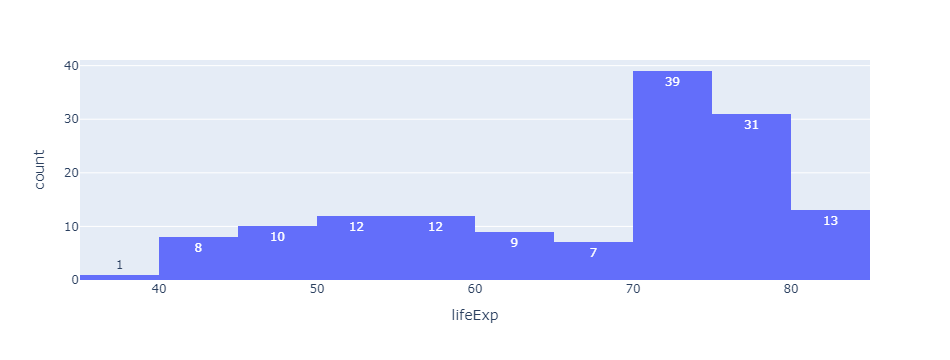

In [19]:
# histogram
# plot histogram of life expt of all countries in 2007 -> nbins -> text_auto
temp_df = gap[gap['year'] == 2007]

px.histogram(temp_df, x='lifeExp',nbins=10,text_auto=True)

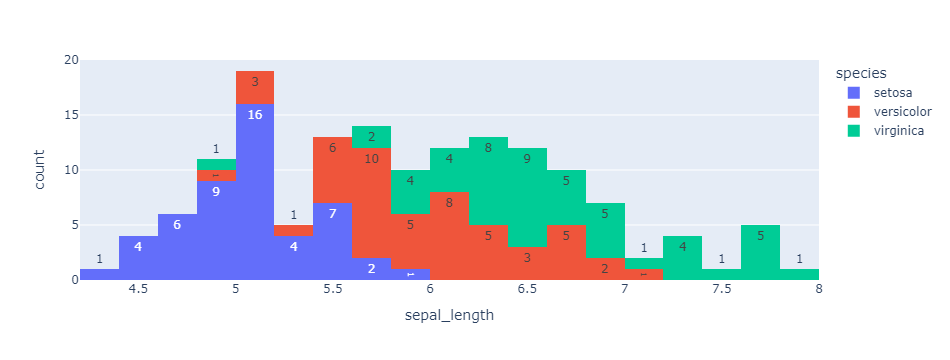

In [20]:
# plot histogram of sepal length of all iris species
px.histogram(iris,x='sepal_length',color='species',nbins=30,text_auto=True)

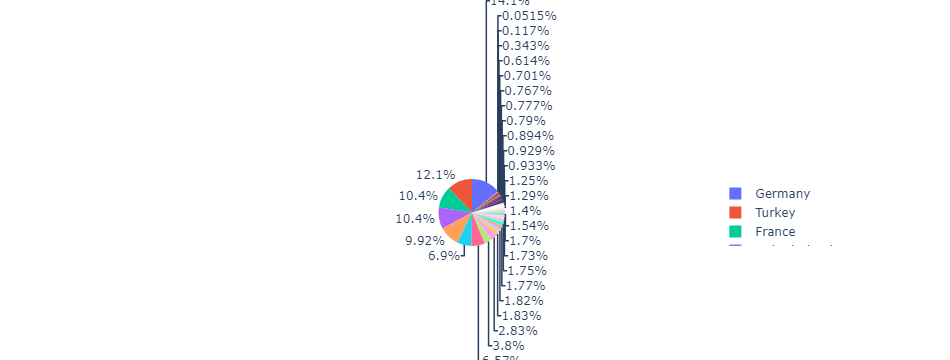

In [21]:
# Pie -> values -> names
# find the pie chart of pop of european countries in 2007

temp_df = gap[(gap['year'] == 2007) & (gap['continent'] == 'Europe')]

px.pie(temp_df, values='pop', names='country')

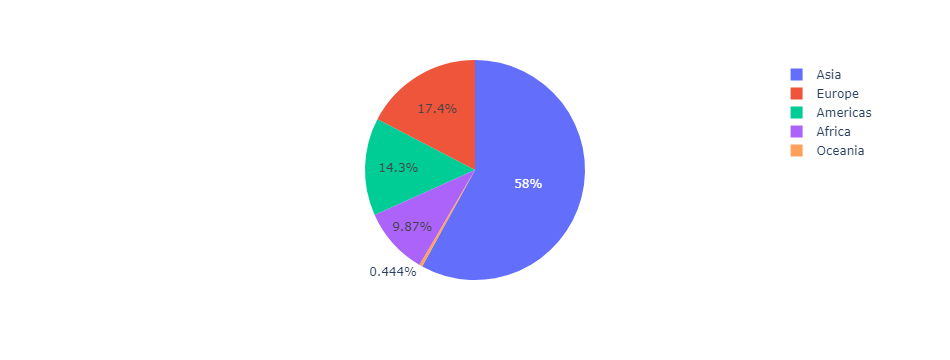

In [22]:
# plot pie chart of world pop in 1952 continent wise ->  -> explode(pull)

temp_df = gap[gap['year'] == 1952].groupby('continent')['pop'].sum().reset_index()
px.pie(temp_df, values='pop', names='continent')

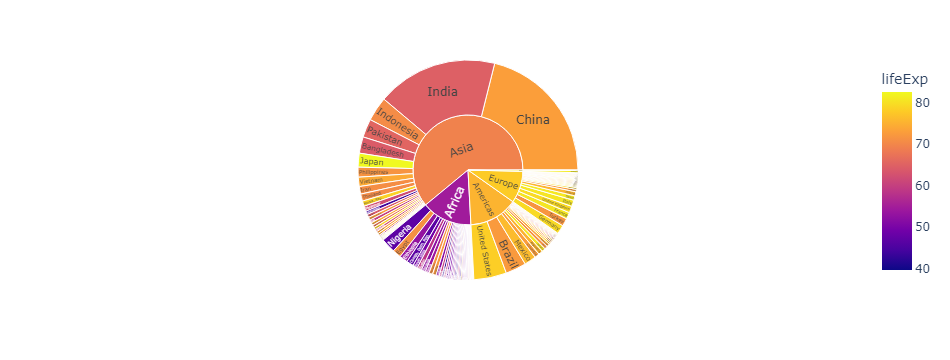

In [23]:
# Sunburst plot -> Sunburst plots visualize hierarchical data spanning outwards radially from root to leaves. -> color
# path -> [], values

temp_df = gap[gap['year'] == 2007]

px.sunburst(temp_df, path=['continent','country'],values='pop',color='lifeExp')

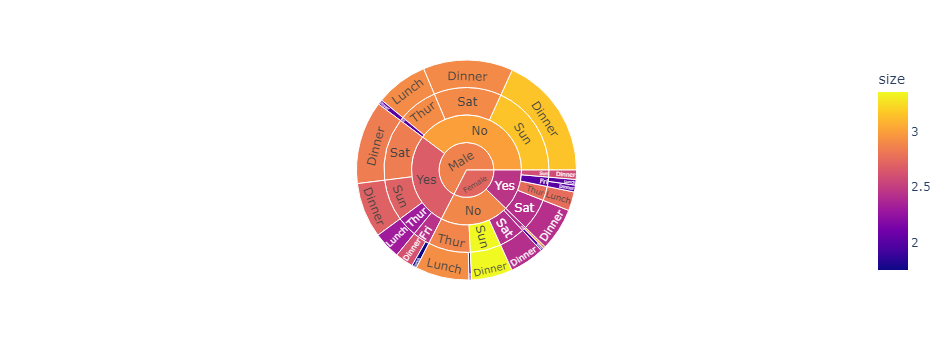

In [24]:
px.sunburst(tips,path=['sex','smoker','day','time'],values='total_bill',color='size')

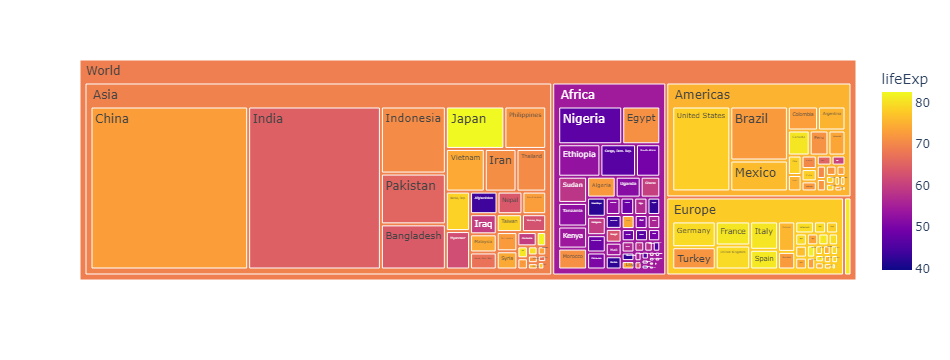

In [25]:
# Treemap
temp_df = gap[gap['year'] == 2007]

px.treemap(temp_df, path=[px.Constant('World'),'continent','country'],values='pop',color='lifeExp')

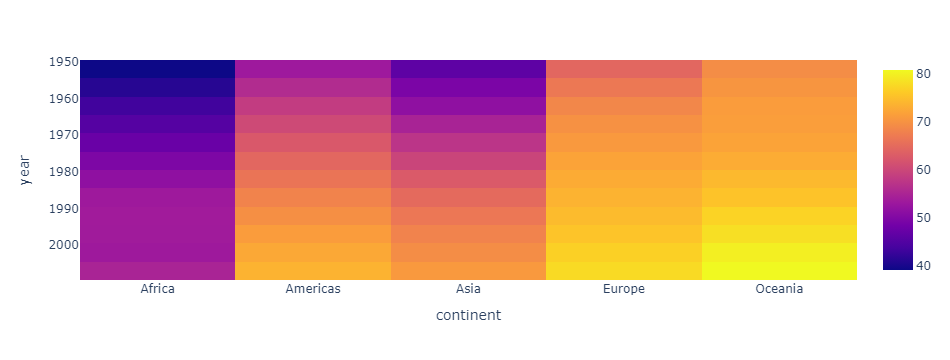

In [26]:
# Heatmap -> find heatmap of all continents with year on avg life exp
#temp_df = tips.pivot_table(index='day',columns='sex',values='total_bill',aggfunc='sum')

temp_df = gap.pivot_table(index='year',columns='continent',values='lifeExp',aggfunc='mean')
px.imshow(temp_df)

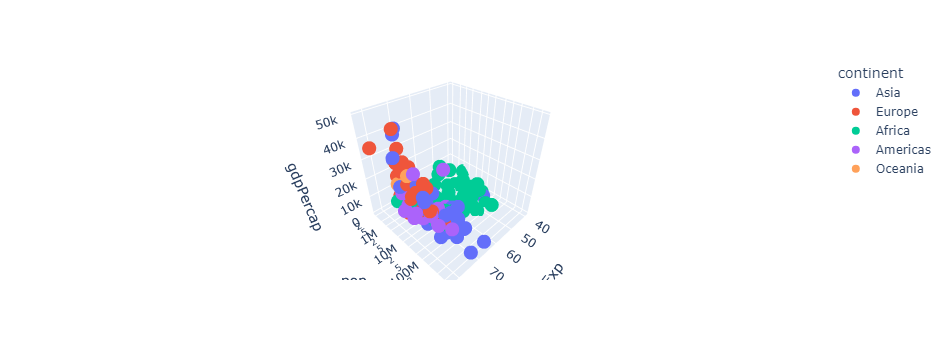

In [27]:
# 3d scatterplot
# plot a 3d scatter plot of all country data for 2007
temp_df = gap[gap['year'] == 2007]
px.scatter_3d(temp_df, x='lifeExp',y='pop',z='gdpPercap',log_y=True,color='continent',hover_name='country')

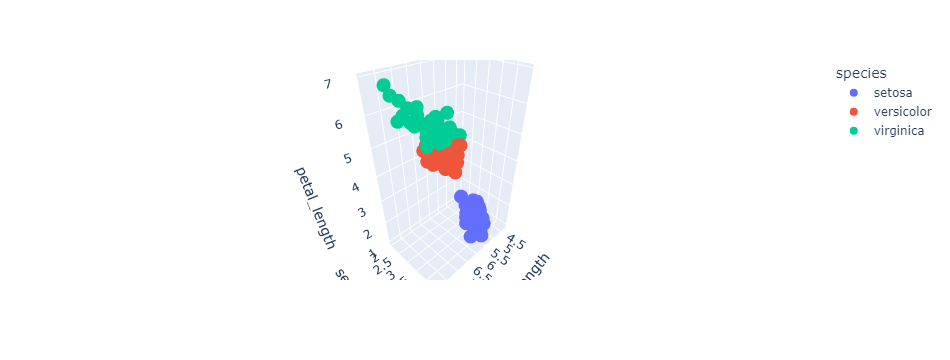

In [28]:
px.scatter_3d(iris,x='sepal_length',y='sepal_width',z='petal_length',color='species')

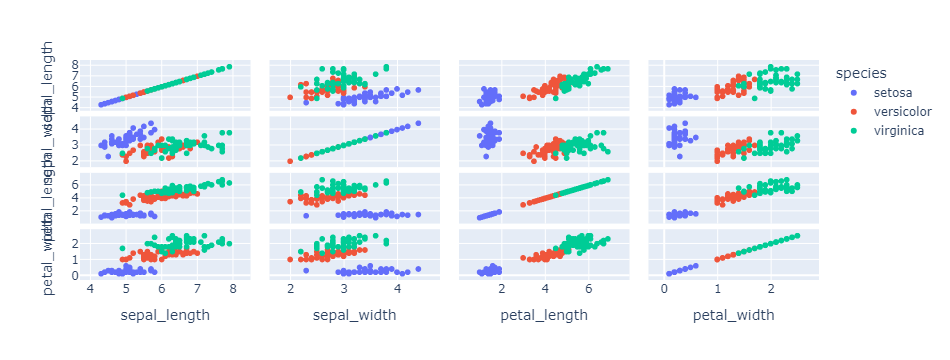

In [29]:
# scatter_matrix -> dimensions
px.scatter_matrix(iris,dimensions=['sepal_length','sepal_width','petal_length','petal_width'],color='species')

In [30]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [31]:
# facet plot
tips = px.data.tips()
gap = px.data.gapminder()

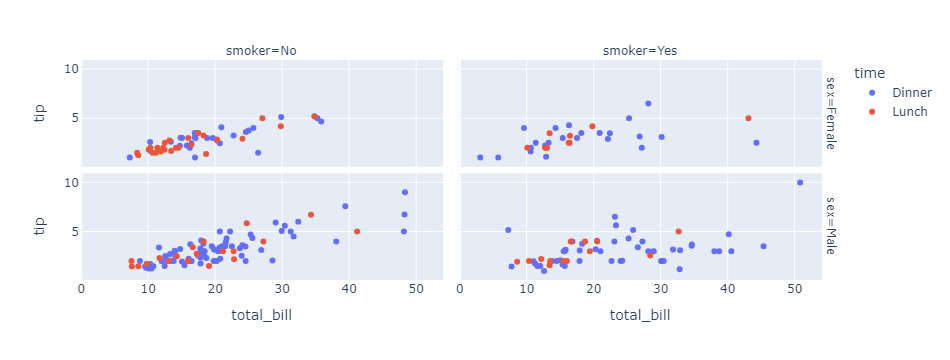

In [32]:
px.scatter(tips, x='total_bill', y='tip', facet_col='smoker', facet_row='sex',color='time')

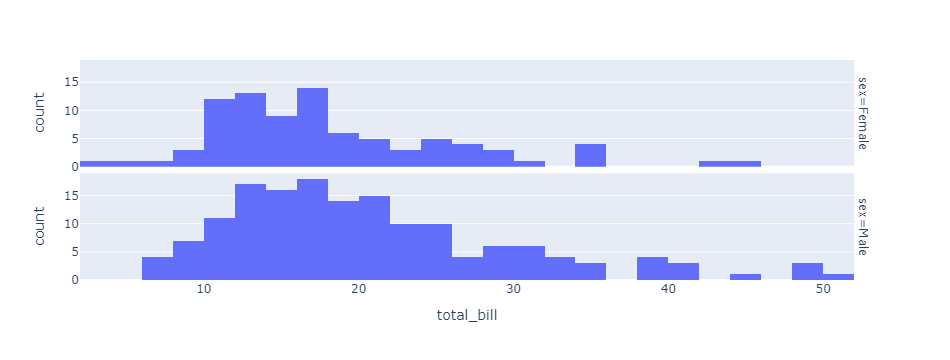

In [33]:
px.histogram(tips,x='total_bill',facet_row='sex')

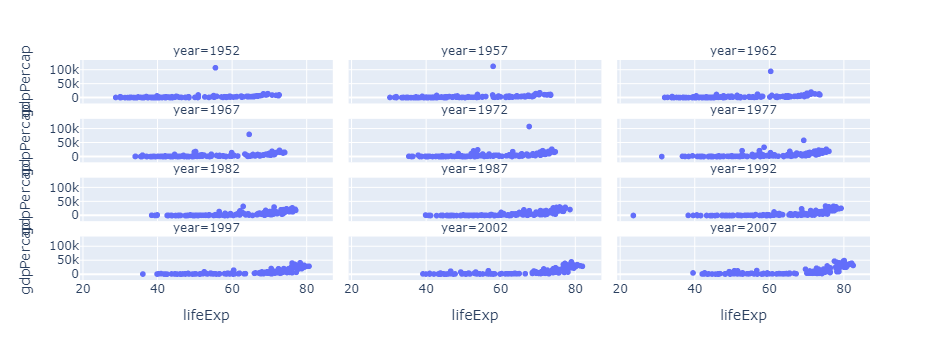

In [34]:
px.scatter(gap, x='lifeExp', y='gdpPercap', facet_col='year', facet_col_wrap=3)

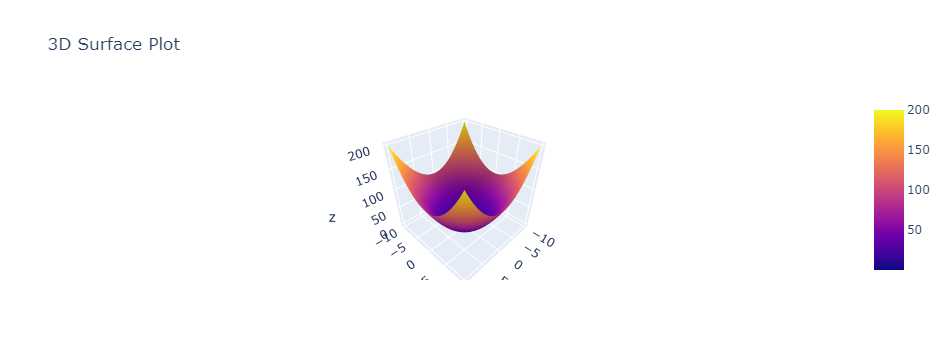

In [35]:
# 3d Surface plot
# can not be created using Plotly express
# we will use plotly graph object -> go

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx, yy = np.meshgrid(x,y)

z = xx**2 + yy**2
# z = np.sin(xx) + np.tan(yy)
# z = np.sqrt(xx**2 + yy**2)


trace = go.Surface(x=x,y=y,z=z)

data = [trace]

layout = go.Layout(title='3D Surface Plot')

fig = go.Figure(data,layout)

fig.show()

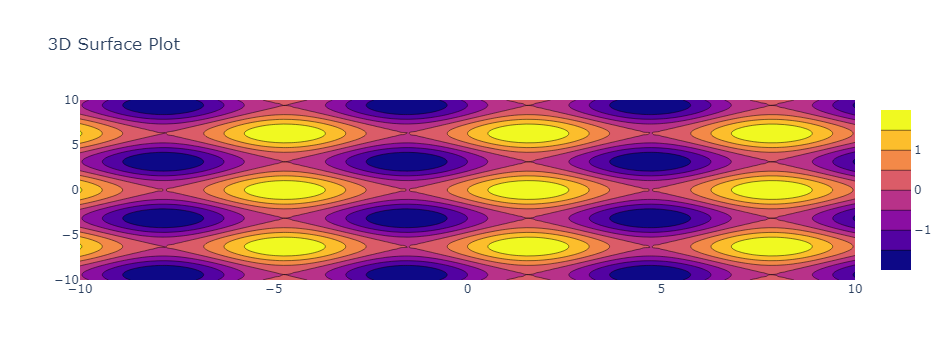

In [36]:
# Contour plot
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx, yy = np.meshgrid(x,y)

# z = xx**2 + yy**2
z = np.sin(xx) + np.cos(yy)
# z = np.sqrt(xx**2 + yy**2)


trace = go.Contour(x=x,y=y,z=z)

data = [trace]

layout = go.Layout(title='3D Surface Plot')

fig = go.Figure(data,layout)

fig.show()

In [37]:
# Subplots
from plotly.subplots import make_subplots

In [38]:
fig = make_subplots(rows=2,cols=2)

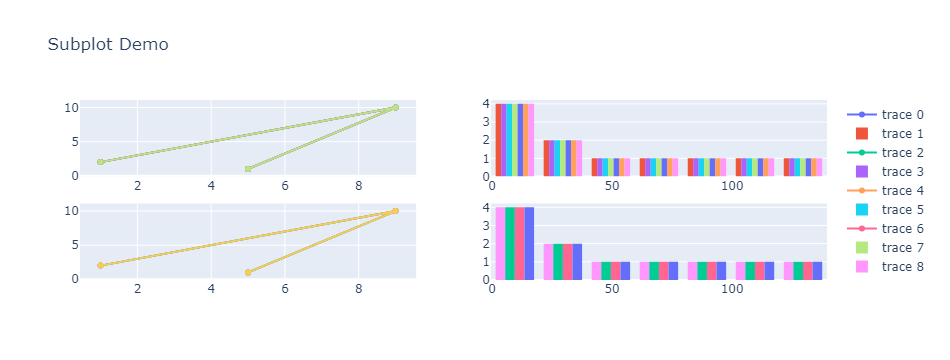

In [61]:
fig.add_trace(
    go.Scatter(x=[1,9,5],y=[2,10,1]),
    row = 1,
    col = 1
)

fig.add_trace(
    go.Histogram(x=[1,9,5,22,109,134,56,78,12,34,89]),
    row = 1,
    col = 2
)

fig.add_trace(
    go.Scatter(x=[1,9,5],y=[2,10,1]),
    row = 2,
    col = 1
)

fig.add_trace(
    go.Histogram(x=[1,9,5,22,109,134,56,78,12,34,89]),
    row = 2,
    col = 2
)

fig.update_layout(title='Subplot Demo')

fig.show(height = 500,width = 500)
